## DecisionTree - playtennis

#### 의사결정 트리를 이용한 데이터 분석
- DecisionTree: 분류, 회귀에서 사용
- 범주형 변수일 때 사용(남여, 혈액형)(여자면 왼 아니면 오)
- 연속셩 변수일 때 회귀 트리로 사용(x보다 크면 왼, 작으면 오)

#### 어떤 것을 맨 먼저 파악하는 게 가지치기가 좋을까? 하는 지표들
- 지니 지수: 같은 종류 많을 수록 값 적음. 0.1... / 값 클수록 데이터끼리 다름. 0.7... : 같은 종류 많은 걸로 루트 정하면 좋다~
- 엔트로피 지수: 데이터 집합의 혼잡도. 작으면 잘 분류된 것
- 정보 이득: 값 클수록 정보 이득이 크다. 선택한 속성이 분류하기 좋다.

#### 적용
- 지니 지수가 가장 작은 Temperture를 루트로 정한다.(먼저 분리 속성으로 정한다.)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 의사결정 트리
from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np
#get_ipython().system('pip install pydotplus')
import pydotplus
import os
#pydotplus 설치 
#anaconda prompt 를 관리자 권한으로 실행
#conda install -c conda-forge pydotplus

In [14]:
tennis_data = pd.read_csv('/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/week10/playtennis 복사본.csv')
tennis_data

,Outlook,Temperature,Humidity,PlayTennis
0,Sunny,Hot,High,No
1,Overcast,Hot,High,Yes
2,Overcast,Mild,Normal,Yes
3,Rain,Mild,Normal,Yes
4,Sunny,Mild,High,Yes
5,Rain,Hot,High,No
6,Overcast,Hot,Normal,No


In [15]:
# 범주형 변수 변경
# String 데이터를 숫자로 인코딩
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,PlayTennis
0,0,3,6,10
1,1,3,6,11
2,1,4,7,11
3,2,4,7,11
4,0,4,6,11
5,2,3,6,10
6,1,3,7,10


In [16]:
# 숫자니까 넘파이 배열로 바꾸자~~ 편하게편하게~~ 컬럼은 저렇게 지정~ 엥 근데 컬럼 안 줘도 되는데 왜 주는지는 교수님도 ㅁㄹ
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))
print(X) # Array of int64
print(y) # Array of int64

[[0 3 6]
 [1 3 6]
 [1 4 7]
 [2 4 7]
 [0 4 6]
 [2 3 6]
 [1 3 7]]
[[10]
 [11]
 [11]
 [11]
 [11]
 [10]
 [10]]


In [23]:
# 학습, 테스트 데이터로 나누기
# train, test 비율은 default=0.25 로 랜덤하게 선택됨 => 아래 링크 참조.
# http://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train)
print(X_test)
# 모두 Array of int64

[[2 3 6]
 [2 4 7]
 [1 3 6]
 [1 3 7]
 [0 4 6]]
[[0 3 6]
 [1 4 7]]


In [24]:
# 모델 생성
dt_clf = DecisionTreeClassifier()
# 모델 학습
dt_clf = dt_clf.fit(X_train, y_train)
# 예측하기
dt_prediction = dt_clf.predict(X_test)
print("예측 값")
print(dt_prediction)
print("\n\n혼동행렬")
print(confusion_matrix(y_test, dt_prediction))
# 2개는 잘 예측, 2개는 테니스 치는 날 아닌데 맞다고 한 거
print("\n\n정확도 이런 거")
print(classification_report(y_test, dt_prediction))

예측 값
[11 11]


혼동행렬
[[0 1]
 [0 1]]


정확도 이런 거
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:3]
target_name = np.array(['Play No', 'Play Yes'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

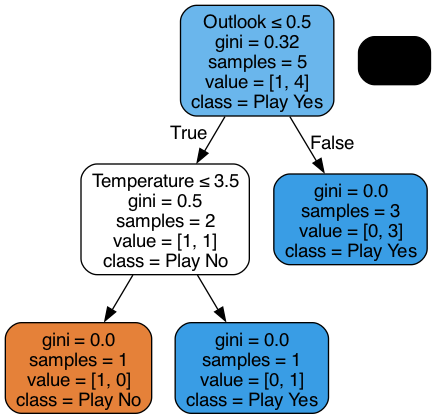

In [20]:
# graphviz 설치 : https://graphviz.org/download/
#os.environ['PATH'] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

# 다음 명령어는 따로 실행해본다.
#graphviz.Source(dt_graph)
Image(dt_graph.create_png())